In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### A Draft Example for Initial Feature Selection

In [36]:
df = pd.read_csv('../datasets/normalized/^BSESN.csv')

In [37]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'volume_adi', 'volume_obv', 'volume_vpt', 'volume_nvi',
       'volatility_bbhi', 'volatility_bbli', 'volatility_kch',
       'volatility_kcl', 'volatility_kcp', 'volatility_kchi',
       'volatility_kcli', 'volatility_atr', 'trend_ichimoku_b', 'trend_adx',
       'trend_adx_pos', 'trend_adx_neg', 'trend_visual_ichimoku_b',
       'trend_psar_up_indicator', 'trend_psar_down_indicator', 'others_dr',
       'others_cr'],
      dtype='object')

### An explaination of key market data and indicators:
Open: The price at which a security first trades upon the opening of an exchange on a given trading day.

High: The highest price at which a stock traded during the course of the trading day.

Low: The lowest price at which a stock traded during the course of the trading day.

Adj Close: This is the closing price after adjustments for all applicable splits and dividend distributions. This price is often used when examining historical returns or performing a detailed analysis of historical returns.

Close: The price of an individual security at the end of the trading day.

Volume: The number of shares or contracts traded in a security or an entire market during a given period, usually one trading day.

<b>The other columns represent various technical indicators used in financial trading:</b>

volatility_kch, volatility_kcl, volatility_kcp, volatility_kchi: These are components of the Keltner Channels, a volatility indicator that shows the upper and lower channels, typically a certain multiple of the Average True Range (ATR) above and below an exponential moving average (EMA).

volatility_bbhi, volatility_bbli: These are components of the Bollinger Bands, a volatility indicator that uses a range of volatility (standard deviation) to establish where a band of likely support or resistance levels might lie.

volatility_atr: The Average True Range (ATR) is a measure of market volatility. It is the average of true price ranges over time, where the true price range is the greatest distance of the following three: current high to the current low, the absolute value of the current high to the previous close, and the absolute value of the current low to the previous close.

volume_adi: Accumulation/Distribution Index (ADI) is a volume-based technical analysis indicator designed to reflect cumulative inflows and outflows of money for an asset by comparing close prices and volumes.

volume_obv: On Balance Volume (OBV) is a momentum indicator that uses volume flow to predict changes in stock price.

volume_nvi: Negative Volume Index (NVI) focuses on days where the volume decreases from the previous day. The premise being that the "smart money" takes positions on these days.

volume_vpt: Volume Price Trend (VPT) is a technical analysis indicator intended to relate price and volume in the stock market. VPT is based on a running cumulative volume that adds or subtracts a multiple of the percentage change in the share price trend and current volume, depending upon the movement of the price.

trend_ichimoku_b, trend_visual_ichimoku_b: These are components of the Ichimoku Cloud, a collection of technical indicators that show levels of support and resistance, direction of momentum, and future areas of support and resistance.

trend_adx: The Average Directional Index (ADX) is used to measure the strength or weakness of a trend, not the actual direction.

trend_adx_pos, trend_adx_neg: These represent the directional movement indicators. They are parts of the ADX. ADX Positive is the positive directional movement, and ADX Negative is the negative directional movement.

others_cr: This stands for Cumulative Return. The cumulative return is the entire amount of money an investment has earned for an investor, irrespective of time. It’s the gain or loss made by the investment, presented in the form of a percentage of the investment’s initial cost.

others_dr: This stands for Daily Return. The daily return measures the dollar change in a stock's price as a percentage of the previous day's closing price. A positive return means the stock has grown in value, while a negative return means it has lost value. It's a useful measure for identifying the volatility and performance of the stock over time.

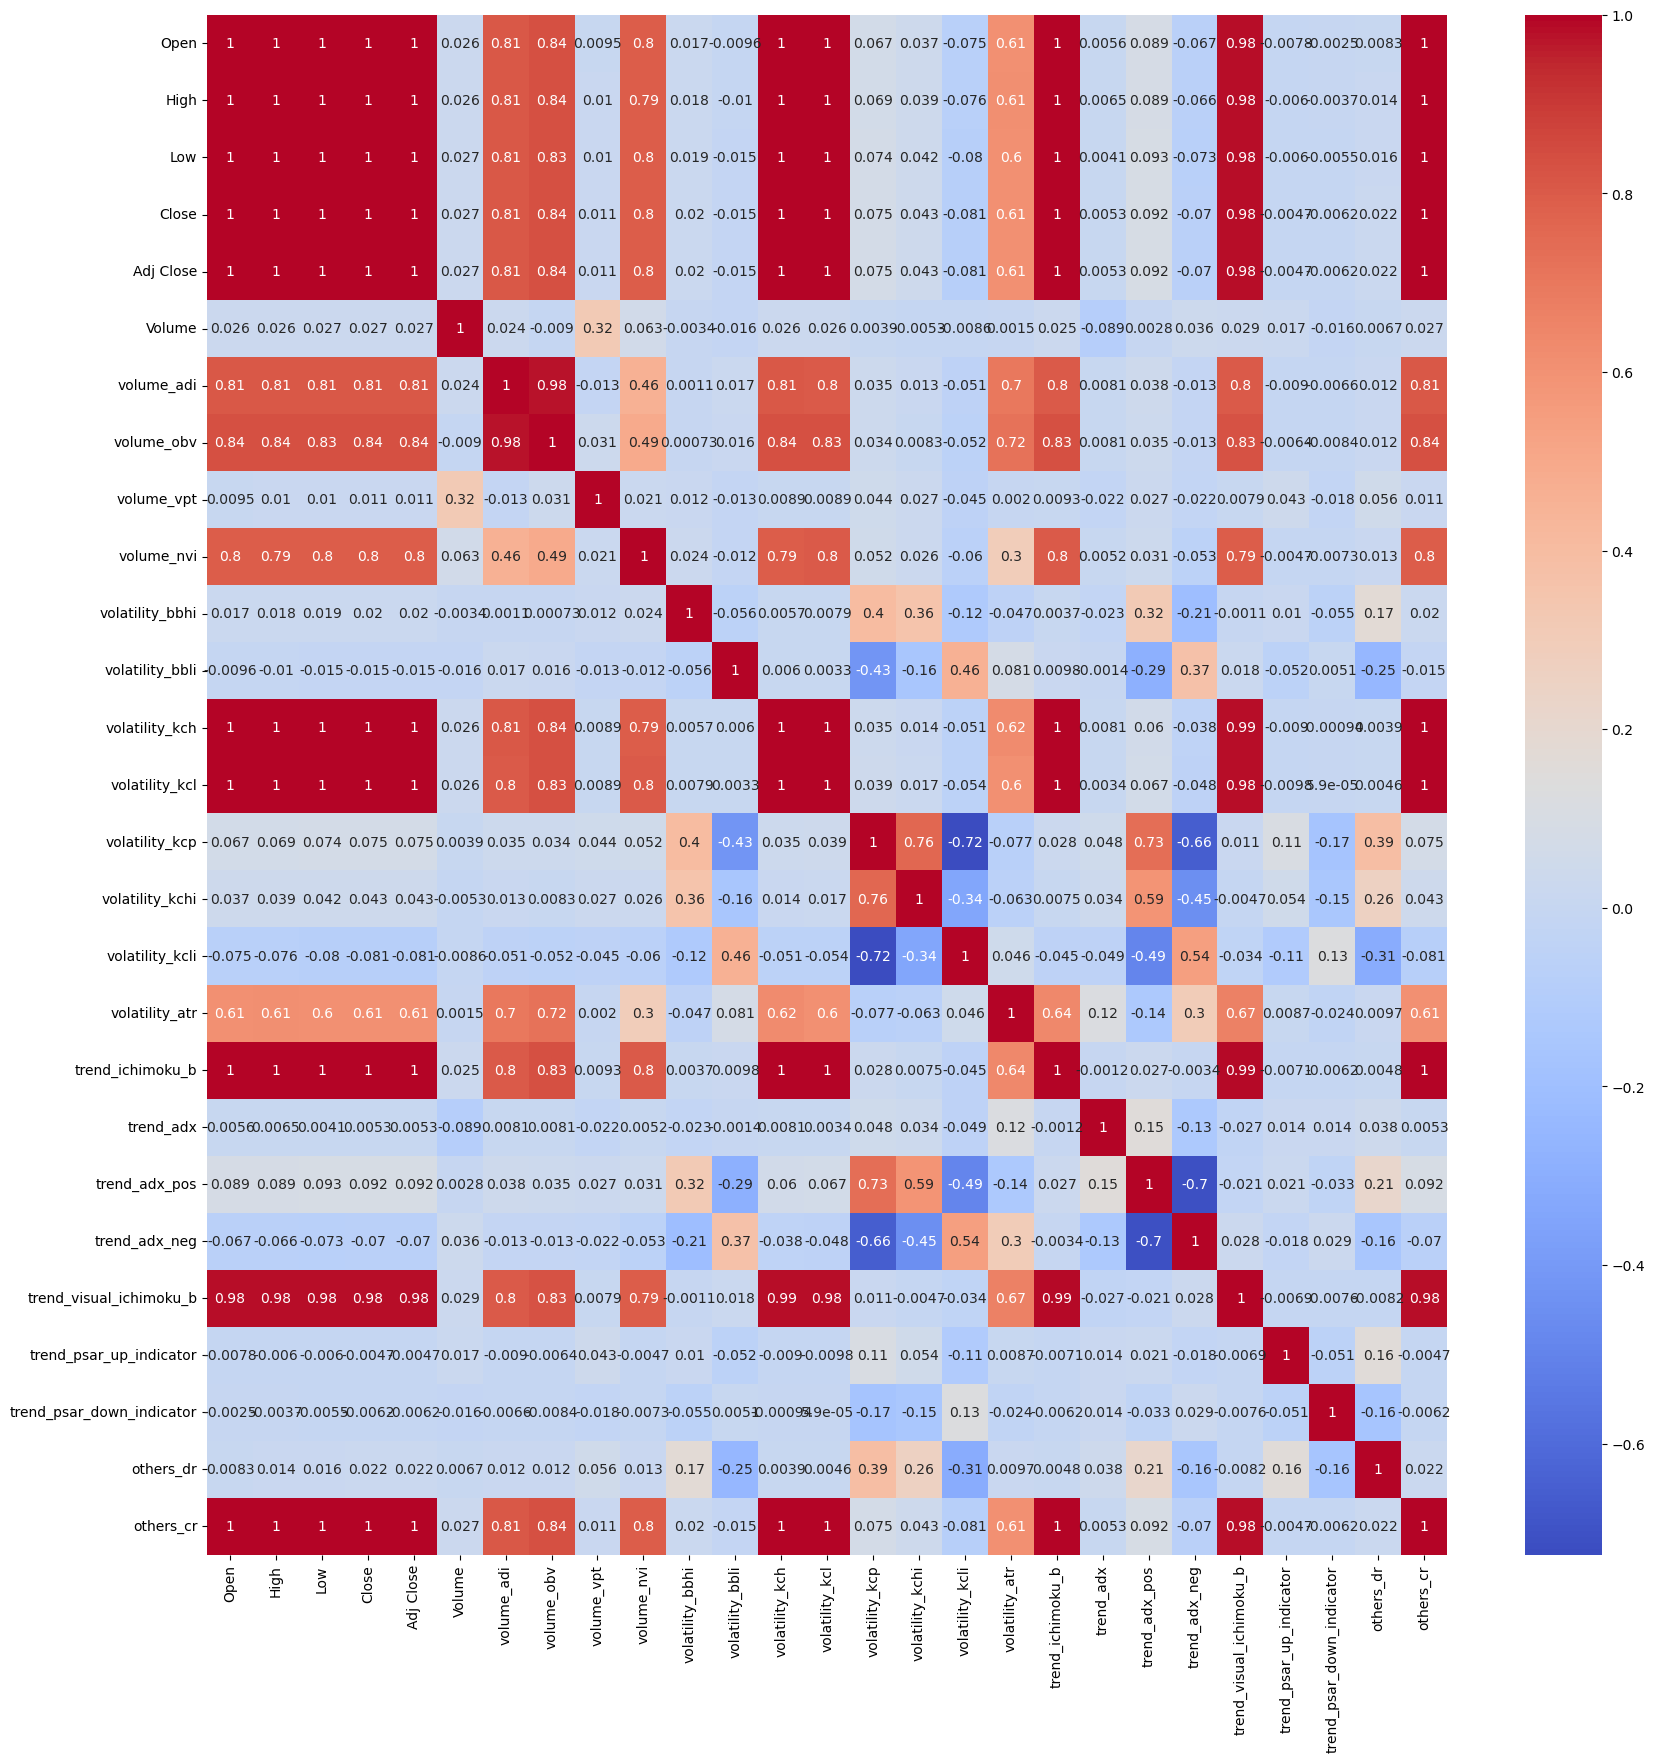

In [38]:
# 将日期设为索引 (如果需要的话)
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# 计算相关性
correlation_matrix = df.corr()

# 将相关性矩阵进行绘制
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


In [39]:
# 假设我们要预测的目标是 'Open'
target = 'Open'

# 计算目标值与其他特征的相关性
correlation_with_target = df.corr()[target].sort_values(ascending=False)

# 选择与目标最相关的20个特征
top_20_features = correlation_with_target[:21]  # 包含目标本身

# 输出这些特征的名称
print(top_20_features.index)

Index(['Open', 'High', 'Low', 'others_cr', 'Adj Close', 'Close',
       'volatility_kcl', 'volatility_kch', 'trend_ichimoku_b',
       'trend_visual_ichimoku_b', 'volume_obv', 'volume_adi', 'volume_nvi',
       'volatility_atr', 'trend_adx_pos', 'volatility_kcp', 'volatility_kchi',
       'Volume', 'volatility_bbhi', 'volume_vpt', 'others_dr'],
      dtype='object')


### A Draft Example for RF Feature Selection

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler

In [41]:
X = df.drop('Open', axis=1)  # 所有特征，去掉目标列
y = df['Open']  # 只有目标列

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Feature Selection
# sel = SelectFromModel(RandomForestRegressor(n_estimators = 100, random_state = 0, n_jobs = -1))
sel = SelectFromModel(estimator=RandomForestRegressor(n_estimators = 100), threshold='0.5*mean')

sel.fit(X_train, y_train)

# get the selected features
selected_features = X.columns[(sel.get_support())]

In [42]:
print(selected_features)

Index(['High', 'Low', 'volume_obv', 'volatility_kch', 'trend_ichimoku_b'], dtype='object')


### Draft Analysis For Stock CHOLAFIN.NS

In [43]:
data = pd.read_csv('../datasets/raw/market_data/CHOLAFIN.NS.csv')

In [44]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,volume_adi,volume_obv,volume_cmf,...,momentum_ppo,momentum_ppo_signal,momentum_ppo_hist,momentum_pvo,momentum_pvo_signal,momentum_pvo_hist,momentum_kama,others_dr,others_dlr,others_cr
0,2008-06-02,27.200001,32.400002,27.200001,28.980000,24.893616,23090.0,-7282.243929,23090.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-86.185097,NaN,0.000000
1,2008-06-03,29.000000,29.000000,27.850000,28.780001,24.721815,7740.0,-2503.626973,15350.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.690127,-0.692520,-0.690127
2,2008-06-04,30.000000,30.000000,27.500000,27.750000,23.837053,4825.0,-6363.626973,10525.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-3.578877,-3.644489,-4.244305
3,2008-06-05,29.100000,29.100000,27.400000,28.230000,24.249369,9260.0,-6581.514215,19785.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.729728,1.714939,-2.587992
4,2008-06-06,28.000000,29.959999,27.559999,27.719999,23.811281,9600.0,-14901.515232,10185.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.806590,-1.823108,-4.347827


First, delete columns that contain only NaN values. Then, perform forward filling to fill in the remaining missing values. Finally, delete columns that still have NaN values. This way, we can ensure that the final dataset does not have any missing values.

In [45]:
# Drop columns where all values are NaN
data = data.dropna(axis=1, how='all')

# Forward fill the remaining missing values
data.fillna(method='ffill', inplace=True)

# Drop columns where any value is NaN
data = data.dropna(axis=1, how='any')

# Check again for missing values
data.isnull().sum().sum()

0

In [46]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'volume_adi', 'volume_obv', 'volume_vpt', 'volume_nvi',
       'volatility_bbhi', 'volatility_bbli', 'volatility_kch',
       'volatility_kcl', 'volatility_kcp', 'volatility_kchi',
       'volatility_kcli', 'volatility_atr', 'trend_ichimoku_b', 'trend_adx',
       'trend_adx_pos', 'trend_adx_neg', 'trend_visual_ichimoku_a',
       'trend_visual_ichimoku_b', 'trend_psar_up_indicator',
       'trend_psar_down_indicator', 'others_dr', 'others_cr'],
      dtype='object')

In [47]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,volume_adi,volume_obv,volume_vpt,...,trend_ichimoku_b,trend_adx,trend_adx_pos,trend_adx_neg,trend_visual_ichimoku_a,trend_visual_ichimoku_b,trend_psar_up_indicator,trend_psar_down_indicator,others_dr,others_cr
0,2008-06-02,27.200001,32.400002,27.200001,28.980000,24.893616,23090.0,-7282.243929,23090.0,-5944.188495,...,29.800001,0.0,0.0,0.0,208.639766,203.579949,0.0,0.0,-86.185097,0.000000
1,2008-06-03,29.000000,29.000000,27.850000,28.780001,24.721815,7740.0,-2503.626973,15350.0,-19953.554735,...,29.800001,0.0,0.0,0.0,208.639766,203.579949,0.0,0.0,-0.690127,-0.690127
2,2008-06-04,30.000000,30.000000,27.500000,27.750000,23.837053,4825.0,-6363.626973,10525.0,-226.096636,...,29.800001,0.0,0.0,0.0,208.639766,203.579949,0.0,1.0,-3.578877,-4.244305
3,2008-06-05,29.100000,29.100000,27.400000,28.230000,24.249369,9260.0,-6581.514215,19785.0,-12.507972,...,29.800001,0.0,0.0,0.0,208.639766,203.579949,0.0,0.0,1.729728,-2.587992
4,2008-06-06,28.000000,29.959999,27.559999,27.719999,23.811281,9600.0,-14901.515232,10185.0,-13.259779,...,29.800001,0.0,0.0,0.0,208.639766,203.579949,0.0,0.0,-1.806590,-4.347827


In [48]:
from sklearn.model_selection import train_test_split

# Define the features and the target
X = data.drop(['Date', 'Close'], axis=1)
y = data['Close']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2951, 27), (738, 27), (2951,), (738,))

In [49]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the random forest regressor
rf = RandomForestRegressor(random_state=42)

# Train the model
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [50]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict on the training data
y_train_pred = rf.predict(X_train)

# Predict on the testing data
y_test_pred = rf.predict(X_test)

# Calculate MSE and R^2 for the training data
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

# Calculate MSE and R^2 for the testing data
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

mse_train, r2_train, mse_test, r2_test

(0.201795020050251, 0.9999959301547393, 1.3179287374030033, 0.9999713535770005)

In [51]:
# Calculate RMSE for the training data
rmse_train = np.sqrt(mse_train)

# Calculate RMSE for the testing data
rmse_test = np.sqrt(mse_test)

rmse_train, rmse_test

NameError: name 'np' is not defined

### Feature Importance Analysis

In [ ]:
# Get feature importances
importances = rf.feature_importances_

# Convert the importances into a DataFrame
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Sort the DataFrame by the importance
feature_importances.sort_values('Importance', ascending=False, inplace=True)

# Display the top 10 features
feature_importances.head(10)